# Challenge Problem for Fellowship.ai

## Global Terrorist Attacks (GTD) 2013 ‐ 2016 data file

## 1. Getting the data and looking at the big picture of the problem

The Global Terrorism Database (GTD) is an open-source database including information on terrorist events around the world from 1970 through 2016. Here in this challenge I am working on the latest data collected from 2013-2016.<br>

I will develop a model should learn from this data and able to predict what group may have been responsible for an incident(terror attack). The challenge is basically supervised learning, i.e classfiication, the are different labels of terrorist groups in the database and some portion of the attacks have not been attributed to a particular terrorist group.

In [1]:
#Load all the necessary library
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

import pandas as pd
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#import data from excel file
data = pd.read_excel('gtd_13to16_0617dist.xlsx', sheetname='Data')

#Get a quick overview what we are dealing in our dataset
data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201301010001,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,201301010002,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2,201301010003,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010003, 201301010002"


In [3]:
#dimensions of the dataset or shape (i.e number of rows and cols)
print data.shape

(57196, 135)


The dataset from Global Terrorism Database(2013-2016) contains `57196` reocrds and `135` fields. 

In [4]:
#copy orignal dataframe
data_GTD = data.copy()

In [5]:
#look at the quick description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57196 entries, 0 to 57195
Columns: 135 entries, eventid to related
dtypes: float64(50), int64(30), object(55)
memory usage: 58.9+ MB


In [6]:
#listing all cols(features) in GTD dataset
#pd.set_option('display.max_columns', None)
list(data.columns)

[u'eventid',
 u'iyear',
 u'imonth',
 u'iday',
 u'approxdate',
 u'extended',
 u'resolution',
 u'country',
 u'country_txt',
 u'region',
 u'region_txt',
 u'provstate',
 u'city',
 u'latitude',
 u'longitude',
 u'specificity',
 u'vicinity',
 u'location',
 u'summary',
 u'crit1',
 u'crit2',
 u'crit3',
 u'doubtterr',
 u'alternative',
 u'alternative_txt',
 u'multiple',
 u'success',
 u'suicide',
 u'attacktype1',
 u'attacktype1_txt',
 u'attacktype2',
 u'attacktype2_txt',
 u'attacktype3',
 u'attacktype3_txt',
 u'targtype1',
 u'targtype1_txt',
 u'targsubtype1',
 u'targsubtype1_txt',
 u'corp1',
 u'target1',
 u'natlty1',
 u'natlty1_txt',
 u'targtype2',
 u'targtype2_txt',
 u'targsubtype2',
 u'targsubtype2_txt',
 u'corp2',
 u'target2',
 u'natlty2',
 u'natlty2_txt',
 u'targtype3',
 u'targtype3_txt',
 u'targsubtype3',
 u'targsubtype3_txt',
 u'corp3',
 u'target3',
 u'natlty3',
 u'natlty3_txt',
 u'gname',
 u'gsubname',
 u'gname2',
 u'gsubname2',
 u'gname3',
 u'gsubname3',
 u'motive',
 u'guncertain1',
 u'gun

In [7]:
##class distribution group name of terrorist
data['gname'].value_counts()

Unknown                                                              29054
Islamic State of Iraq and the Levant (ISIL)                           4287
Taliban                                                               4119
Al-Shabaab                                                            2125
Boko Haram                                                            1501
New People's Army (NPA)                                                993
Maoists                                                                960
Houthi extremists (Ansar Allah)                                        879
Kurdistan Workers' Party (PKK)                                         783
Al-Qaida in the Arabian Peninsula (AQAP)                               645
Donetsk People's Republic                                              614
Tehrik-i-Taliban Pakistan (TTP)                                        528
Fulani extremists                                                      427
Muslim extremists        

In [8]:
#Checking number of different group name terrorist listed 
data.gname.nunique()

711

In [9]:
#listing attacktypes1 and their corresponding occurrences in the dataset
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      30130
Armed Assault                          13076
Hostage Taking (Kidnapping)             4315
Assassination                           3504
Unknown                                 2828
Facility/Infrastructure Attack          2729
Unarmed Assault                          257
Hostage Taking (Barricade Incident)      212
Hijacking                                145
Name: attacktype1_txt, dtype: int64

In [10]:
#listing target areas by the terrorist group and their corresponding occurrences in the dataset
data['targtype1_txt'].value_counts()

Private Citizens & Property       14967
Military                          11537
Police                             8773
Government (General)               5045
Business                           4050
Unknown                            3370
Religious Figures/Institutions     1536
Terrorists/Non-State Militia       1282
Transportation                     1202
Educational Institution            1197
Utilities                          1174
Journalists & Media                 720
Violent Political Party             670
Government (Diplomatic)             514
Other                               413
NGO                                 244
Telecommunication                   196
Airports & Aircraft                 145
Maritime                             63
Food or Water Supply                 53
Tourists                             37
Abortion Related                      8
Name: targtype1_txt, dtype: int64

In [11]:
#listing weapons used and their corresponding occurrences in the dataset
data['weaptype1_txt'].value_counts()

Explosives/Bombs/Dynamite                                                      32636
Firearms                                                                       16052
Unknown                                                                         4812
Incendiary                                                                      2459
Melee                                                                           1028
Chemical                                                                          83
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       58
Other                                                                             39
Sabotage Equipment                                                                24
Biological                                                                         3
Fake Weapons                                                                       2
Name: weaptype1_txt, dtype: int64

In [12]:
#listing regions which is most terrorissim happend during 2013-2016
data.region_txt.value_counts()

Middle East & North Africa     23509
South Asia                     17805
Sub-Saharan Africa              7287
Southeast Asia                  4416
Eastern Europe                  1946
Western Europe                  1073
South America                    769
North America                    201
East Asia                         92
Central Asia                      41
Australasia & Oceania             34
Central America & Caribbean       23
Name: region_txt, dtype: int64

In [13]:
#summary of all numerical attributes in the data
data.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.719600e+04,57196.000000,57196.000000,57196.000000,57196.000000,0.0,57196.000000,57196.000000,56822.000000,56822.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,289.000000,4691.000000,4692.000000,57196.000000,57196.000000,57196.00000,57196.000000
mean,2.014588e+11,2014.521575,6.451745,15.740384,0.063134,NaN,124.610305,8.285055,26.580380,51.514957,...,2.613664e+06,2.287094e+04,6.709180e+04,33.916955,4.823065,-35.658994,-4.932985,-4.799357,0.06149,-4.506014
std,1.066753e+08,1.068020,3.409832,8.810116,0.243206,NaN,92.569261,2.289634,13.026790,32.101971,...,1.759453e+07,3.882338e+05,5.246047e+05,588.333180,2.001340,55.890585,4.509504,4.665811,0.24023,4.711814
min,2.013010e+11,2013.000000,1.000000,1.000000,0.000000,NaN,4.000000,1.000000,-42.884049,-124.224996,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,0.00000,-9.000000
25%,2.014022e+11,2014.000000,4.000000,8.000000,0.000000,NaN,92.000000,6.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.00000,-9.000000
50%,2.014123e+11,2014.000000,6.000000,16.000000,0.000000,NaN,104.000000,10.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.00000,-9.000000
75%,2.015121e+11,2015.000000,9.000000,23.000000,0.000000,NaN,160.000000,10.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,NaN,1004.000000,12.000000,65.825119,176.986756,...,2.000000e+08,6.600000e+06,8.117150e+06,10000.000000,7.000000,837.000000,1.000000,1.000000,1.00000,1.000000


In [14]:
#cheking how many missing or NaN values are in each column
data.isnull().sum()

eventid                   0
iyear                     0
imonth                    0
iday                      0
approxdate            50401
extended                  0
resolution            57196
country                   0
country_txt               0
region                    0
region_txt                0
provstate                 0
city                      0
latitude                374
longitude               374
specificity               0
vicinity                  0
location              34523
summary                   0
crit1                     0
crit2                     0
crit3                     0
doubtterr                 0
alternative           46767
alternative_txt       46767
multiple                  0
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
                      ...  
propextent            36728
propextent_txt        36728
propvalue             36728
propcomment           28281
ishostkid           

In [15]:
#checking correlations 
pd.set_option('precision', 3)
corr_data = data.corr(method='pearson')
corr_data

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000,0.999,-2.204e-02,-1.499e-02,2.924e-02,NaN,0.009,0.083,-0.027,-4.790e-02,...,-5.368e-02,-9.314e-02,-0.121,8.227e-02,7.888e-02,-0.034,0.153,1.528e-01,-1.545e-02,0.143
iyear,0.999,1.000,-5.415e-02,-1.631e-02,2.885e-02,NaN,0.009,0.082,-0.027,-4.719e-02,...,-5.545e-02,-9.440e-02,-0.118,8.059e-02,7.847e-02,-0.033,0.152,1.517e-01,-1.543e-02,0.142
imonth,-0.022,-0.054,1.000e+00,1.062e-02,4.190e-03,NaN,0.011,0.027,0.014,-2.155e-02,...,7.211e-02,3.058e-02,-0.085,8.548e-02,-4.187e-03,-0.015,0.025,2.522e-02,-1.639e-03,0.023
iday,-0.015,-0.016,1.062e-02,1.000e+00,-8.401e-03,NaN,-0.002,0.004,0.018,6.409e-04,...,2.879e-02,-7.766e-02,-0.022,-5.818e-02,-1.486e-02,0.005,0.008,8.379e-03,1.628e-03,0.009
extended,0.029,0.029,4.190e-03,-8.401e-03,1.000e+00,NaN,0.022,0.024,-0.058,-3.410e-02,...,2.152e-02,8.593e-03,0.016,8.409e-03,3.928e-01,-0.341,0.120,1.206e-01,5.685e-02,0.126
resolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,0.009,0.009,1.074e-02,-1.942e-03,2.168e-02,NaN,1.000,0.191,-0.143,-1.164e-01,...,6.642e-02,5.071e-02,0.024,-1.044e-01,5.700e-02,-0.106,0.024,2.856e-02,1.609e-01,0.081
region,0.083,0.082,2.730e-02,3.511e-03,2.366e-02,NaN,0.191,1.000,0.007,-4.847e-01,...,5.618e-02,5.067e-02,0.036,-4.080e-02,2.035e-01,-0.178,0.064,7.760e-02,2.954e-02,0.072
latitude,-0.027,-0.027,1.446e-02,1.822e-02,-5.753e-02,NaN,-0.143,0.007,1.000,-8.290e-02,...,1.378e-01,8.483e-02,0.035,7.509e-02,9.711e-03,0.025,-0.148,-1.359e-01,2.277e-02,-0.102
longitude,-0.048,-0.047,-2.155e-02,6.409e-04,-3.410e-02,NaN,-0.116,-0.485,-0.083,1.000e+00,...,-1.439e-02,-2.804e-02,-0.034,1.420e-02,-9.018e-02,0.097,-0.064,-6.818e-02,-9.617e-02,-0.097


In [16]:
#skew of each attribute
data_skew = data.skew()
data_skew

eventid               0.013
iyear                 0.008
imonth                0.013
iday                  0.011
extended              3.593
resolution              NaN
country               3.773
region               -0.446
latitude             -0.901
longitude            -0.600
specificity           1.715
vicinity              3.279
crit1               -10.107
crit2               -15.709
crit3                -1.841
doubtterr             1.645
alternative           3.398
multiple              1.657
success              -2.022
suicide               3.820
attacktype1           1.598
attacktype2           0.449
attacktype3          -0.953
targtype1             0.389
targsubtype1          0.388
natlty1               3.224
targtype2            -0.664
targsubtype2         -0.664
natlty2               4.104
targtype3            -0.927
                     ...   
weapsubtype3          0.168
weaptype4               NaN
weaptype4_txt           NaN
weapsubtype4            NaN
weapsubtype4_txt    

## 2 Discover and Visualize the data to gain Insights

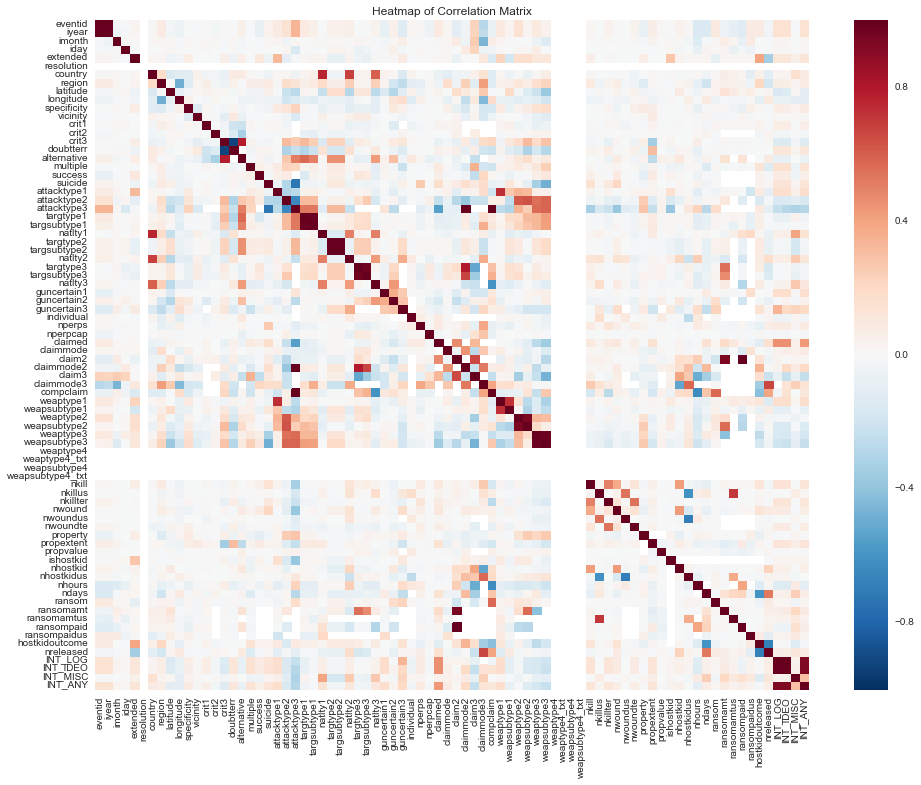

In [17]:
#heatmap correlations of the dataset
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
fig = plt.figure(figsize=(16, 12))
sns.heatmap(corr_data, xticklabels=corr_data.columns.values, yticklabels=corr_data.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

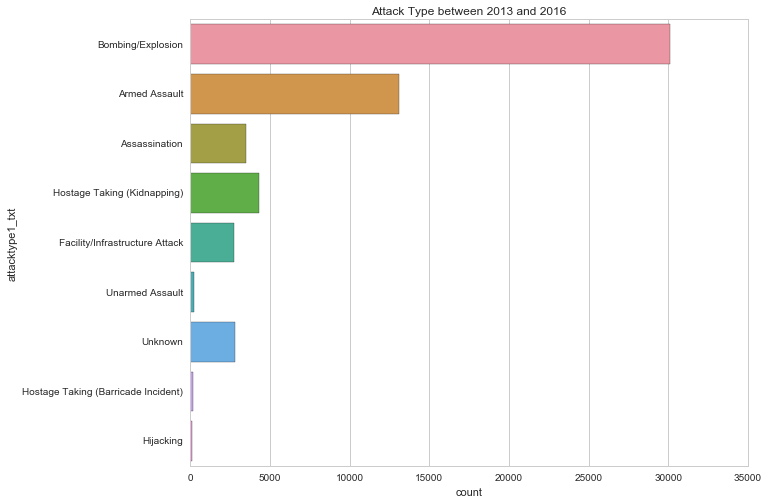

In [18]:
#counting different attack type
plt.figure(figsize=(10, 8))
plt.title("Attack Type between 2013 and 2016")
sns.countplot(y=data.attacktype1_txt)

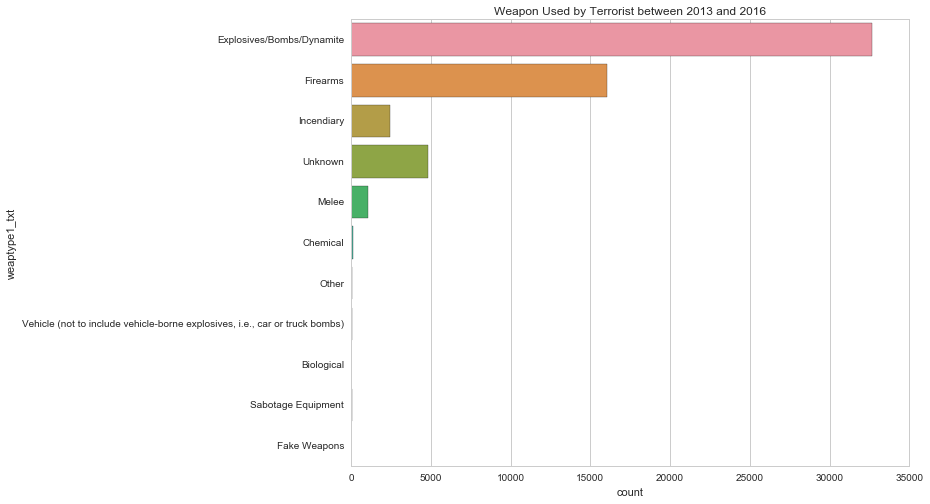

In [19]:
#counting what kind of weapon used
plt.figure(figsize=(10, 8))
plt.title("Weapon Used by Terrorist between 2013 and 2016")
sns.countplot(y=data.weaptype1_txt)

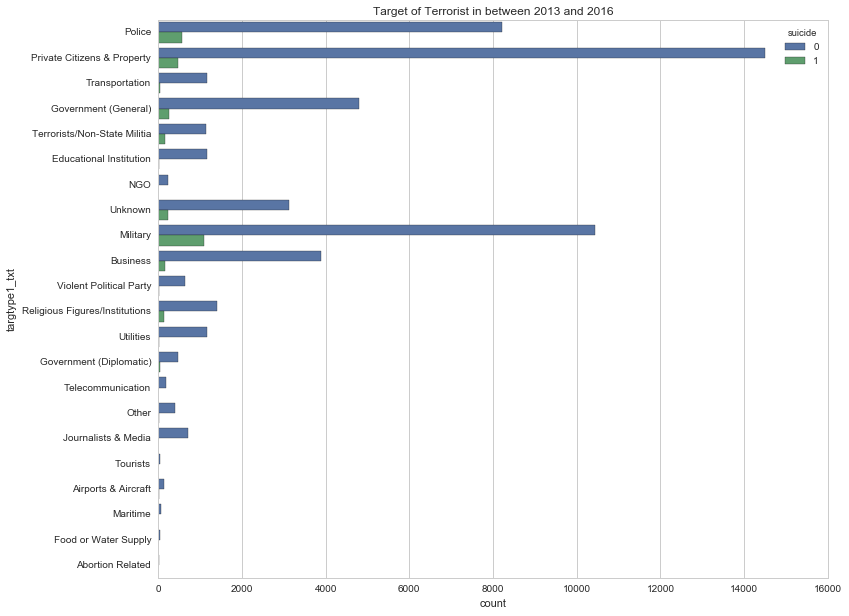

In [20]:
#target of terrorist 
plt.figure(figsize=(12, 10))
plt.title("Target of Terrorist in between 2013 and 2016")
sns.countplot(y=data.targtype1_txt, hue=data.suicide)

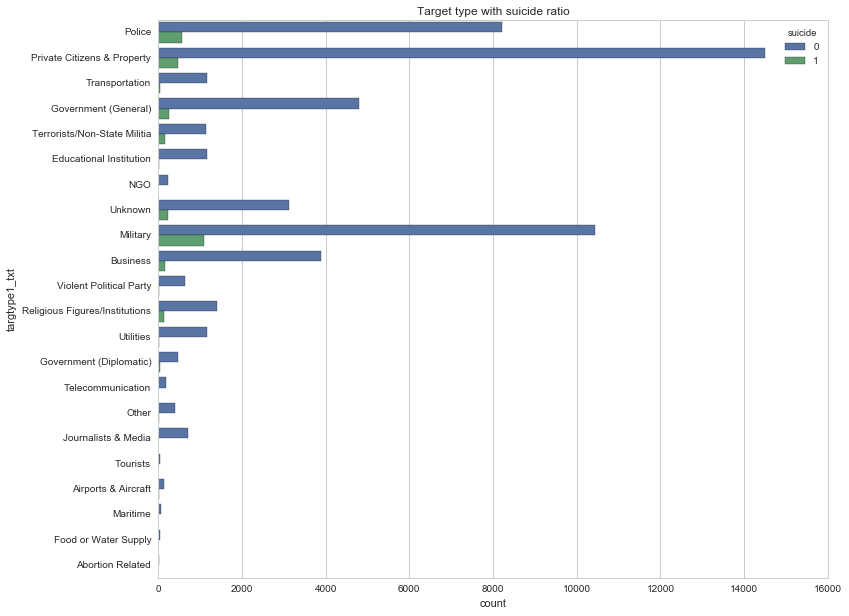

In [21]:
plt.figure(figsize=(12, 10))
plt.title("Target type with suicide ratio")
sns.countplot(y=data.targtype1_txt, hue=data.suicide)

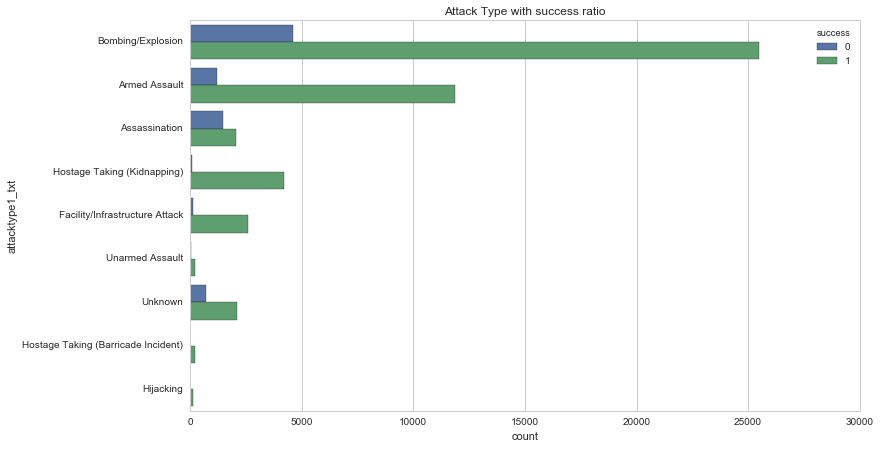

In [22]:
plt.figure(figsize=(12, 7))
plt.title("Attack Type with success ratio")
sns.countplot(y=data.attacktype1_txt, hue=data.success)

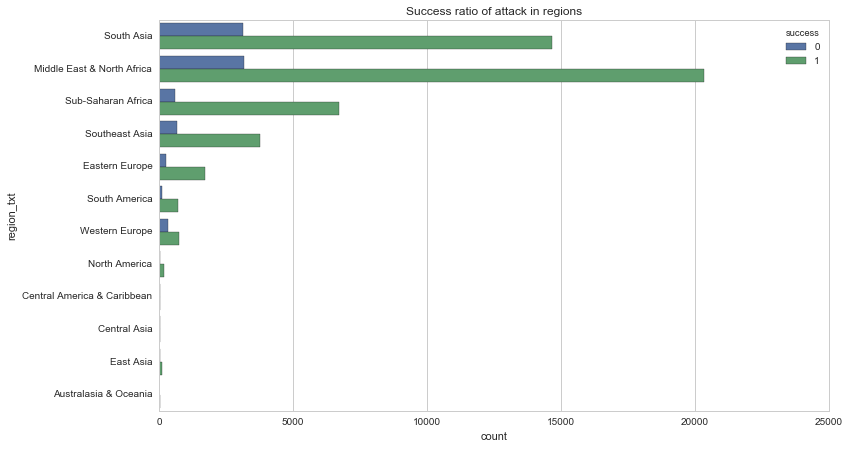

In [23]:
#counting number of attacks in regions
plt.figure(figsize=(12, 7))
plt.title("Success ratio of attack in regions")
sns.countplot(y=data.region_txt, hue=data.success)

## 3. Prepare the data for Machine Learning algorithms
Many Machine Learning algorithm make assumptions about your data. It's time to prepare the data for Machine Learning algorithms in such way that to best expose the structure of the problem.

In [24]:
#taking subset of the independet variable that helps for group name prediction
features = data[['iyear', 'imonth', 'iday', 'region', 'suicide', 'success', 'attacktype1',  'targtype1', 'individual', 'claimed', 'weaptype1', 'ishostkid' , 'nkill', 'nwound', 'ransom']]

#set target value from data in a single dataframe
target = data[['gname']]

In [25]:
#renaming columns
features = features.rename(columns={'eventid': 'id', 'iyear':'year', 'imonth':'month', 'iday':'day', 'attacktype1':'attack_type1',  'targtype1':'target_type1', 'weaptype1':'weapon_type1', 'nkill':"num_kill", 'nwound':'num_wound'})

#dependet variable (predicator)
target = target.rename(columns={'gname': 'group_name'})

In [26]:
#shape of features
features.shape

(57196, 15)

In [27]:
#shape of the target
target.shape

(57196, 1)

In [28]:
#Info about the features attributes
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57196 entries, 0 to 57195
Data columns (total 15 columns):
year            57196 non-null int64
month           57196 non-null int64
day             57196 non-null int64
region          57196 non-null int64
suicide         57196 non-null int64
success         57196 non-null int64
attack_type1    57196 non-null int64
target_type1    57196 non-null int64
individual      57196 non-null int64
claimed         57196 non-null int64
weapon_type1    57196 non-null int64
ishostkid       57196 non-null int64
num_kill        54255 non-null float64
num_wound       52139 non-null float64
ransom          4691 non-null float64
dtypes: float64(3), int64(12)
memory usage: 6.5 MB


The sample dataset provides the Global Terrorism Database from 2013-2016 information. It includes `57196` records and `16` fields.

In [29]:
#Infor about target attributes
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57196 entries, 0 to 57195
Data columns (total 1 columns):
group_name    57196 non-null object
dtypes: object(1)
memory usage: 446.9+ KB


In [30]:
#checking null NaN or missing values
features.isnull().sum()

year                0
month               0
day                 0
region              0
suicide             0
success             0
attack_type1        0
target_type1        0
individual          0
claimed             0
weapon_type1        0
ishostkid           0
num_kill         2941
num_wound        5057
ransom          52505
dtype: int64

In [31]:
#filling NaN or missing value with mean value and convert data type to int (num_kill, num_wound, ransom)
a = np.mean(features.num_kill)
features.num_kill = features.num_kill.fillna(a).apply(np.int64)

b = np.mean(features.num_wound)
features.num_wound = features.num_wound.fillna(b).apply(np.int64)

c = np.mean(features.ransom)
features.ransom = features.ransom.fillna(c).apply(np.int64)

In [32]:
#checking null NaN or missing values
features.isnull().sum()

year            0
month           0
day             0
region          0
suicide         0
success         0
attack_type1    0
target_type1    0
individual      0
claimed         0
weapon_type1    0
ishostkid       0
num_kill        0
num_wound       0
ransom          0
dtype: int64

In [33]:
#chekcing individual unique values
print"Day of attack", features.day.unique()
print "Regions where attack happen", features.region.unique()
print "Attack type", features.attack_type1.unique()
print "Target of attack", features.target_type1.unique()
print "Weapon Type", features.weapon_type1.unique()


Day of attack [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]
Regions where attack happen [ 6 10 11  5  9  3  8  1  2  7  4 12]
Attack type [3 2 1 6 7 8 9 5 4]
Target of attack [ 3 14 19  2 17  8 12 20  4  1 22 15 21  7 16 13 10 18  6 11  9  5]
Weapon Type [ 6  5  8 13  9  2 12 10  1 11  7]


In [34]:
#chekcing null or NaN value in depedent variable 
target.isnull().sum()

group_name    0
dtype: int64

In [35]:
#List of all Group may be responsible for the attack
print "Group name of Terrorist", target.group_name.unique()

Group name of Terrorist [u'Unknown' u'Tehrik-i-Taliban Pakistan (TTP)' u'Boko Haram'
 u'Al-Nusrah Front' u'Revolutionary Armed Forces of Colombia (FARC)'
 u"New People's Army (NPA)" u"Kurdistan Workers' Party (PKK)" u'Taliban'
 u'Al-Shabaab' u'Al-Qaida in the Arabian Peninsula (AQAP)'
 u'National Liberation Army of Colombia (ELN)' u'Muslim extremists'
 u"Sudan People's Liberation Movement - North"
 u'Informal Anarchist Federation' u'Mapuche activists'
 u'United Liberation Front of Assam (ULFA)'
 u'Bangladesh Nationalist Party (BNP)'
 u'Democratic Front for the Liberation of Rwanda (FDLR)'
 u'Animal Liberation Front (ALF)' u'Maoists' u'Shiv Sena'
 u'Communist Party of India - Maoist (CPI-Maoist)'
 u'Baloch Liberation Army (BLA)' u'United National Liberation Front (UNLF)'
 u'Separatists' u'Kachin Independence Army (KIA)' u'Lashkar-e-Jhangvi'
 u'United Baloch Army (UBA)'
 u'National Socialist Council of Nagaland-Khaplang (NSCN-K)'
 u'Militant Minority (Greece)' u'Hizbul Mujahideen (HM)'
 

In [36]:
#description and statistical summary of the features
features.describe()

,year,month,day,region,suicide,success,attack_type1,target_type1,individual,claimed,weapon_type1,ishostkid,num_kill,num_wound,ransom
count,57196.000,57196.000,57196.00,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000,57196.000
mean,2014.522,6.452,15.74,8.285,0.057,0.856,3.395,8.832,0.003,0.169,6.452,0.051,2.532,3.107,-0.022
std,1.068,3.410,8.81,2.290,0.232,0.352,1.916,6.555,0.055,0.375,2.147,0.595,11.357,11.656,0.500
min,2013.000,1.000,1.00,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,-9.000,0.000,0.000,-9.000
25%,2014.000,4.000,8.00,6.000,0.000,1.000,2.000,3.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000
50%,2014.000,6.000,16.00,10.000,0.000,1.000,3.000,4.000,0.000,0.000,6.000,0.000,1.000,1.000,0.000
75%,2015.000,9.000,23.00,10.000,0.000,1.000,3.000,14.000,0.000,0.000,6.000,0.000,2.000,3.000,0.000
max,2016.000,12.000,31.00,12.000,1.000,1.000,9.000,22.000,1.000,1.000,13.000,1.000,1500.000,1500.000,1.000


In [37]:
#shape of the subset features
features.shape

(57196, 15)

In [38]:
#listing all col of features dataframe
list(features.columns)

['year',
 'month',
 'day',
 u'region',
 u'suicide',
 u'success',
 'attack_type1',
 'target_type1',
 u'individual',
 u'claimed',
 'weapon_type1',
 u'ishostkid',
 'num_kill',
 'num_wound',
 u'ransom']

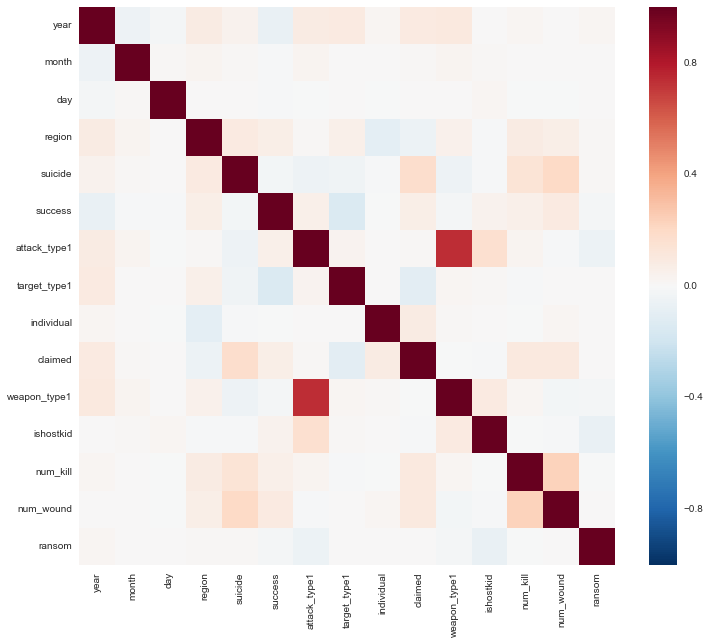

In [39]:
#correlation matrix
plt.figure(figsize=(12, 10))
features_corr = features.corr()
sns.heatmap(features_corr)

From the above correlation matrix, we can easily look at the correlation between `attacktype1` and `weapontype1`. There is a highly positive correlation between these two features.

*Data Processing*: In logistic regression models, encoding all the independent variables as dummy variable allows easy interpretation and calculation of the odds ratios, and increase the stability and significance of the coefficients.

In [40]:
#Creating dummy variables, that is variables with only values zero and one.
features_dummies = pd.get_dummies(features, columns=['region', 'attack_type1', 'target_type1', 'weapon_type1'])
features_dummies.head(2)

,year,month,day,suicide,success,individual,claimed,ishostkid,num_kill,num_wound,...,weapon_type1_2,weapon_type1_5,weapon_type1_6,weapon_type1_7,weapon_type1_8,weapon_type1_9,weapon_type1_10,weapon_type1_11,weapon_type1_12,weapon_type1_13
0,2013,1,1,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1,1,0,1,0,0,0,1,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
features_dummies.columns

Index([           u'year',           u'month',             u'day',
               u'suicide',         u'success',      u'individual',
               u'claimed',       u'ishostkid',        u'num_kill',
             u'num_wound',          u'ransom',        u'region_1',
              u'region_2',        u'region_3',        u'region_4',
              u'region_5',        u'region_6',        u'region_7',
              u'region_8',        u'region_9',       u'region_10',
             u'region_11',       u'region_12',  u'attack_type1_1',
        u'attack_type1_2',  u'attack_type1_3',  u'attack_type1_4',
        u'attack_type1_5',  u'attack_type1_6',  u'attack_type1_7',
        u'attack_type1_8',  u'attack_type1_9',  u'target_type1_1',
        u'target_type1_2',  u'target_type1_3',  u'target_type1_4',
        u'target_type1_5',  u'target_type1_6',  u'target_type1_7',
        u'target_type1_8',  u'target_type1_9', u'target_type1_10',
       u'target_type1_11', u'target_type1_12', u'target_type1_

In [42]:
#looking at index 
print "index of region_1: ", features_dummies.columns.get_loc('region_1')
print "index of attack_type1_1: ", features_dummies.columns.get_loc('attack_type1_1')
print "index of attack_type1_1: ", features_dummies.columns.get_loc('target_type1_1')
print "index of weapon_type1_1: ", features_dummies.columns.get_loc('weapon_type1_1')

index of region_1:  11
index of attack_type1_1:  23
index of attack_type1_1:  32
index of weapon_type1_1:  54


In [43]:
#drop columns inorder to prevent from multi-colinearity
features_dummies.drop(features_dummies.columns[[11, 23, 32, 54]], axis=1, inplace=True)

In [44]:
features_dummies.head()

,year,month,day,suicide,success,individual,claimed,ishostkid,num_kill,num_wound,...,weapon_type1_2,weapon_type1_5,weapon_type1_6,weapon_type1_7,weapon_type1_8,weapon_type1_9,weapon_type1_10,weapon_type1_11,weapon_type1_12,weapon_type1_13
0,2013,1,1,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1,1,0,1,0,0,0,1,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,1,1,0,1,0,0,0,0,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,1,1,0,1,0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,1,1,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Select  a model, train and evaluate it

In [45]:
#split-out validation dataset (separate train-test dataset)
from sklearn.model_selection import train_test_split

#split the data train_data 75% and test_data 25%
features_train, features_test, target_train, target_test = train_test_split(features_dummies, target, test_size=0.25, random_state=42)

In [46]:
#Import algorithms and Standardize the dataset
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#create list that stores all the estimators
pipelines = []
pipelines.append(('Scaled_LR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled_KNN', Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled_SVC', Pipeline([('scaler', StandardScaler()), ('SVC', SVC())])))
pipelines.append(('Scaled_DT', Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier())])))
pipelines.append(('Scaled_NB', Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])))

#create results list to store results after cross_val_score
results = []

#store names of the model in the names list
names = []

#computing each model using cross_val_score
for name, model in pipelines:
    kfold = KFold(n_splits=3, random_state=42)
    #model = model.fit(features_train, features_test)
    cv_results = cross_val_score(model, features_train, target_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_LR: 0.647528 (0.004087)
Scaled_KNN: 0.627293 (0.001185)
Scaled_SVC: 0.646642 (0.002830)
Scaled_DT: 0.588340 (0.002968)
Scaled_NB: 0.020304 (0.001656)


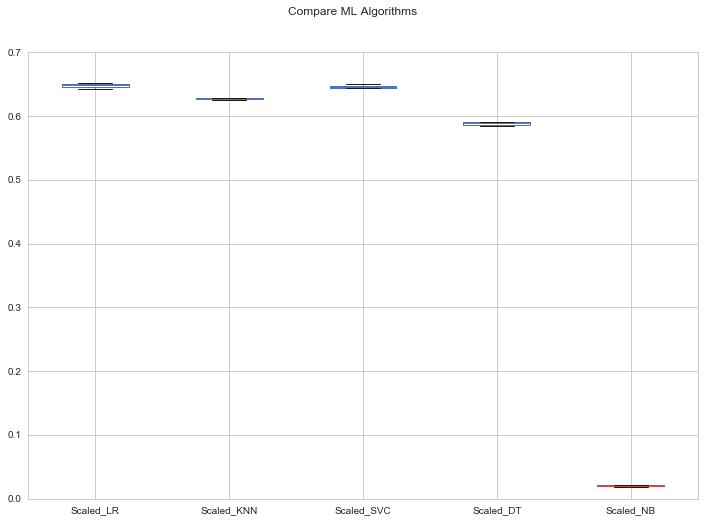

In [47]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Compare ML Algorithms")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5. Fine-tune the selected model
*Improve Performance Logistic Regression with Tuning Hyperparameter*:
Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this case I will use `GridSearchCV` for (tunning)selecting best parameters for *Logistic Regression* model.

In [ ]:
#Algorithm Tuning of Logistic regression (LR)
#Basically smaller C specify stronger regularization.
#l1 regularization is used, because it's good for less variables and more raining dataset
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01, 0.1, 1, 10]}
clf_grid = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=param_grid, scoring='accuracy', cv=kfold)
clf_grid_result = clf_grid.fit(features_train, target_train)

## 6. Present the solution

In this project, I took a Global Terrorism data that is collected from 2013-2016. I am looking into the main features that can help in the classification of the group terrorist according to the data collected and the hints that provided from fellowship.ai, I make the assumption that I took 15 features in order to predict 1 the target of the task. I have more than 700 classes of group terrorist but the almost 50% that incident is shown as from unknown group, but there is also mainly actively terrorist group they have responsibility for many incidents these are :

The Islamic State of Iraq and the Levant (ISIL)                           4287, 
Taliban                                                               4119, 
Al-Shabaab                                                            2125, 
Boko Haram                                                            1501

This aim of this project is to classify the group of the terrorist group based on attack type, weapons used, description of the attack. So we are given features as well as it's labeled, it is a supervised task (Classification task). I tried to test different supervised learning algorithms and trying to compare their results, then finally to select a best perform algorithms. I select logistic regression and I am running the hyperparameters of the algorithm in order to get the best result out of it.